# Covid19 Data Analysis with respect to Countries, GDP per Capita, Social Support, Life Expectancy and Corruption for comparative study of 3 countries China, India and Italy
-------------------------------------------------------------------------

### Importing the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported.')

Modules are imported.


## Data Preprocessing and Cleaning

### Importing Dataset

In [2]:
corona_dataset_csv = pd.read_csv('/content/covid19_Confirmed_dataset.csv')
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [3]:
corona_dataset_csv.shape

(266, 104)

In [4]:
columns = corona_dataset_csv.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

### Deleting the useless columns

In [5]:
corona_dataset_csv.drop(["Lat",
                        "Long"],
                        axis=1,
                        inplace = True
                        )

In [6]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Aggregating the rows by the country

In [7]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [8]:
corona_dataset_aggregated.drop(["Province/State"],
                        axis=1,
                        inplace = True
                        )

In [9]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
corona_dataset_aggregated.shape

(187, 100)

## Visualizing Data related to China, India and other Countries

In [11]:
corona_dataset_aggregated.loc["China"]

,China
1/22/20,548
1/23/20,643
1/24/20,920
1/25/20,1406
1/26/20,2075
...,...
4/26/20,83912
4/27/20,83918
4/28/20,83940
4/29/20,83944


Text(0.5, 1.0, 'COVID-19 Cases in China')

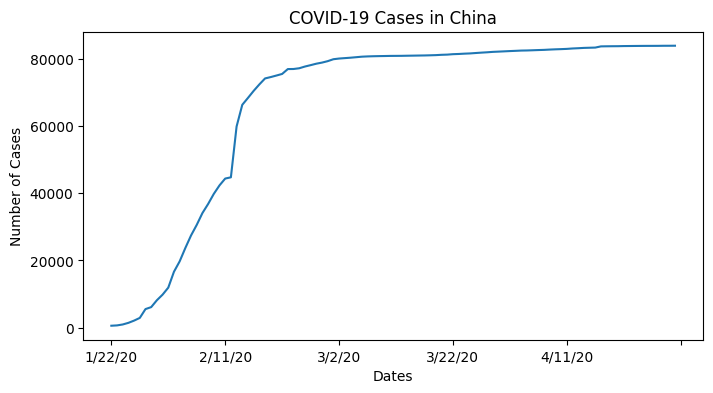

In [12]:
plt.figure(figsize=(8, 4))
corona_dataset_aggregated.loc['China'].plot()

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Cases in China")

Text(0.5, 1.0, 'COVID-19 Cases in India')

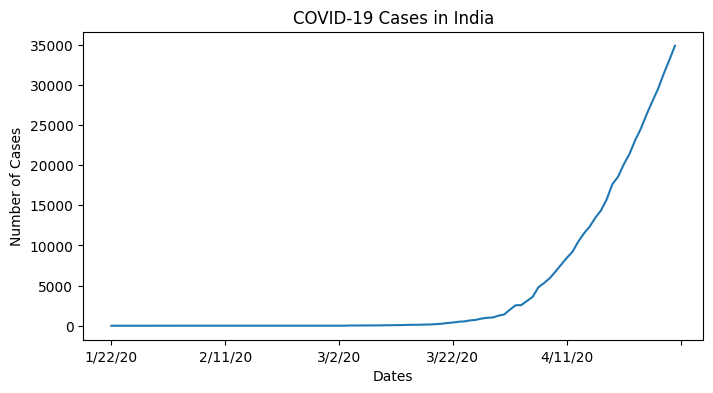

In [13]:
plt.figure(figsize=(8, 4))
corona_dataset_aggregated.loc['India'].plot()

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Cases in India")

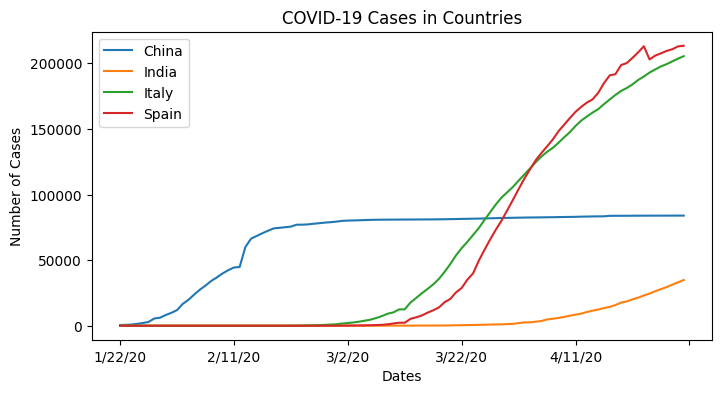

In [14]:
plt.figure(figsize=(8, 4))

corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['India'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Cases in Countries")
plt.legend()

Text(0.5, 1.0, 'COVID-19 Cases in China in first 3 days')

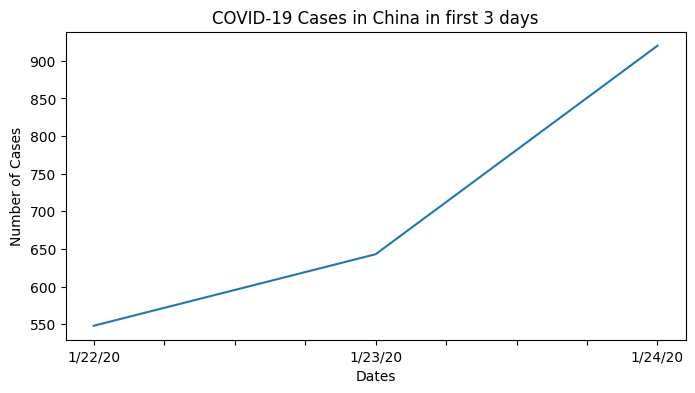

In [15]:
plt.figure(figsize=(8, 4))
corona_dataset_aggregated.loc['China'][:3].plot()

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Cases in China in first 3 days")

### Visualization of Infection Rate in China and India

Text(0.5, 1.0, 'Infection Rate of COVID-19 in China')

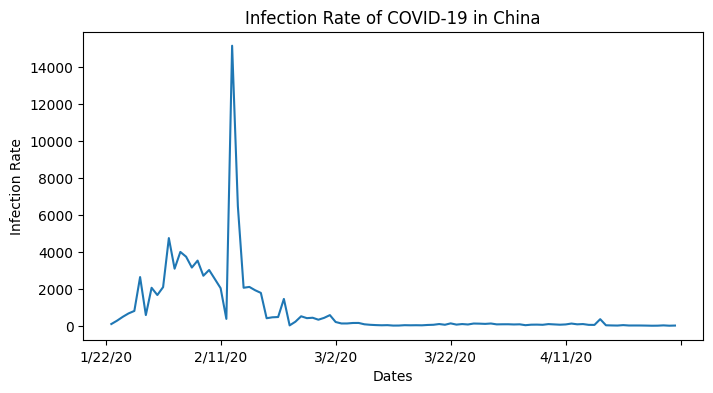

In [16]:
plt.figure(figsize=(8, 4))
corona_dataset_aggregated.loc["China"].diff().plot()

plt.xlabel("Dates")
plt.ylabel("Infection Rate")
plt.title("Infection Rate of COVID-19 in China")

Text(0.5, 1.0, 'Infection Rate of COVID-19 in India')

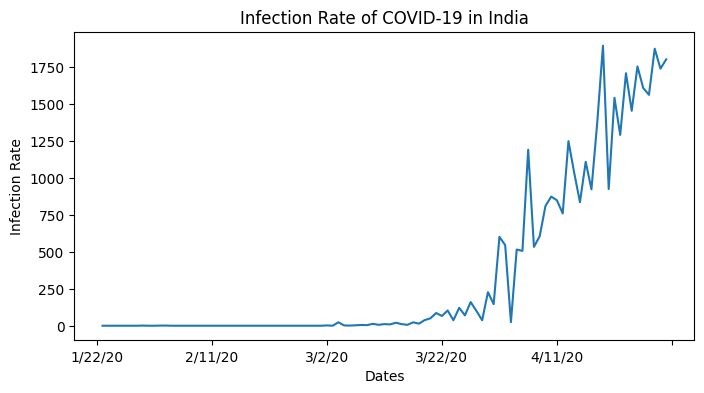

In [17]:
plt.figure(figsize=(8, 4))
corona_dataset_aggregated.loc["India"].diff().plot()

plt.xlabel("Dates")
plt.ylabel("Infection Rate")
plt.title("Infection Rate of COVID-19 in India")

### Maxmimum Infection Rate for China and India

In [18]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [19]:
corona_dataset_aggregated.loc["India"].diff().max()

1893.0

In [20]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [21]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

### Maximum Infection Rate for all Countries

In [22]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
max_infection_rates

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [23]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [24]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Creating a new dataframe with only max_infection_rates

In [25]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])

In [26]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Importing the World Happiness Dataset

In [27]:
happiness_report = pd.read_csv("/content/worldwide_happiness_report.csv")

In [28]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Dropping the useless Columns

In [29]:
useless_cols = ["Overall rank", "Score", "Generosity"]

In [30]:
happiness_report.drop(useless_cols, axis=1, inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.410
2,Norway,1.488,1.582,1.028,0.603,0.341
3,Iceland,1.380,1.624,1.026,0.591,0.118
4,Netherlands,1.396,1.522,0.999,0.557,0.298


### Changing the indices of the Dataframe

In [31]:
happiness_report.set_index("Country or region", inplace=True)

In [32]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,0.393
Denmark,1.383,1.573,0.996,0.592,0.410
Norway,1.488,1.582,1.028,0.603,0.341
Iceland,1.380,1.624,1.026,0.591,0.118
Netherlands,1.396,1.522,0.999,0.557,0.298


## Joining both Datasets

#### Corona Dataset :

In [33]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [34]:
corona_data.shape

(187, 1)

#### World Happiness Dataset :

In [35]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,0.393
Denmark,1.383,1.573,0.996,0.592,0.410
Norway,1.488,1.582,1.028,0.603,0.341
Iceland,1.380,1.624,1.026,0.591,0.118
Netherlands,1.396,1.522,0.999,0.557,0.298


In [36]:
happiness_report.shape

(156, 5)

In [37]:
data = corona_data.join(happiness_report, how = "inner")
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,232.0,0.350,0.517,0.361,0.000,0.025
Albania,34.0,0.947,0.848,0.874,0.383,0.027
Algeria,199.0,1.002,1.160,0.785,0.086,0.114
Argentina,291.0,1.092,1.432,0.881,0.471,0.050
Armenia,134.0,0.850,1.055,0.815,0.283,0.064


### Correlation Matrix

In [38]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196,0.097703
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603,0.311577
Social support,0.191958,0.759468,1.000000,0.765286,0.456246,0.203225
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892,0.314811
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000,0.446677
Perceptions of corruption,0.097703,0.311577,0.203225,0.314811,0.446677,1.000000


## Visualization of the Results

In [39]:
data = data[data["max_infection_rates"] > 0]
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,232.0,0.350,0.517,0.361,0.000,0.025
Albania,34.0,0.947,0.848,0.874,0.383,0.027
Algeria,199.0,1.002,1.160,0.785,0.086,0.114
Argentina,291.0,1.092,1.432,0.881,0.471,0.050
Armenia,134.0,0.850,1.055,0.815,0.283,0.064


### Plotting Total Number of Infected Cases and Countries

In [40]:
corona_dataset_aggregated_reset = corona_dataset_aggregated.reset_index()
total_infected_cases = corona_dataset_aggregated_reset.iloc[:, 1:-1].sum(axis=1)

country_cases = pd.DataFrame({
    'Country': corona_dataset_aggregated_reset['Country/Region'],
    'Total Infected Cases': total_infected_cases
})

country_cases.set_index("Country", inplace=True)
country_cases

,Total Infected Cases
Country,
Afghanistan,28462
Albania,17864
Algeria,74325
Andorra,21893
Angola,649
...,...
West Bank and Gaza,11195
Western Sahara,142
Yemen,31


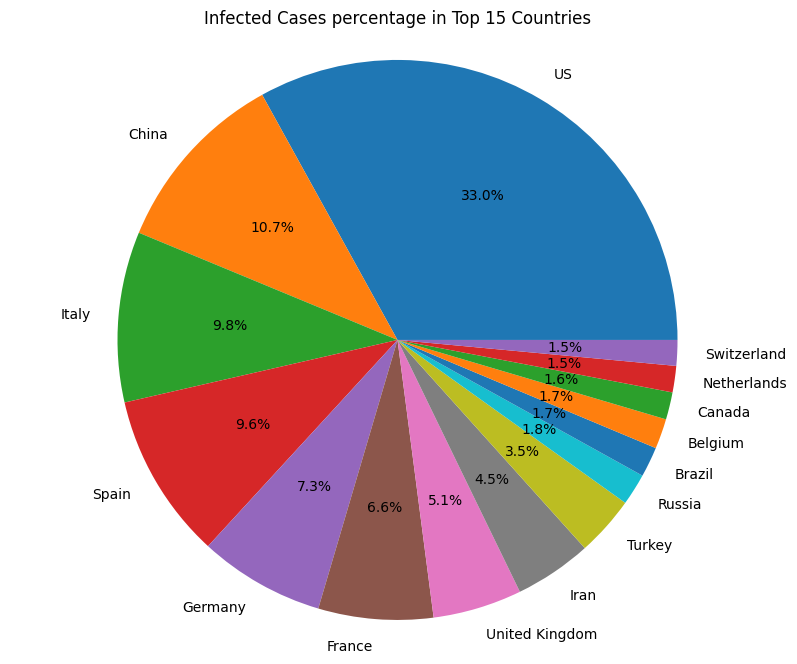

In [41]:
import matplotlib.pyplot as plt
top_n = 15
country_cases_sorted = country_cases.sort_values(by='Total Infected Cases', ascending=False).head(top_n)

plt.figure(figsize=(10, 8))
plt.pie(country_cases_sorted['Total Infected Cases'], labels=country_cases_sorted.index, autopct='%1.1f%%', startangle=0)
plt.title(f'Infected Cases percentage in Top {top_n} Countries')
plt.axis('equal')

plt.show()

### Plotting GDP vs Maximum Infection Rate

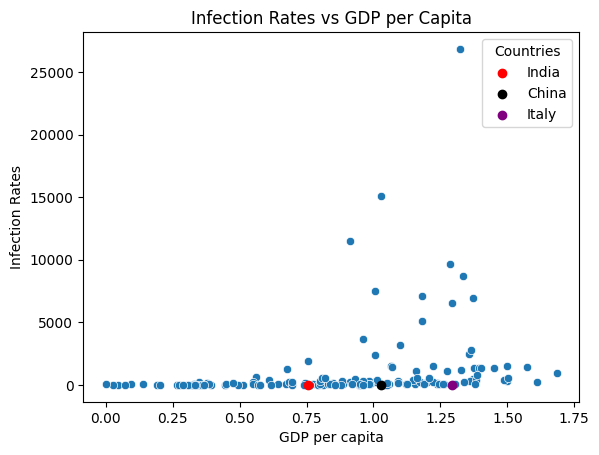

In [42]:
x = data["GDP per capita"]
y = data["max_infection_rates"]

sns.scatterplot(x=x, y=y)

plt.xlabel("GDP per capita")
plt.ylabel("Max Infection Rates")
plt.title("Max Infection Rates vs GDP per Capita")

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "GDP per capita"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)


plt.xlabel("GDP per capita")
plt.ylabel("Infection Rates")
plt.title("Infection Rates vs GDP per Capita")

plt.legend(title='Countries')

plt.show()

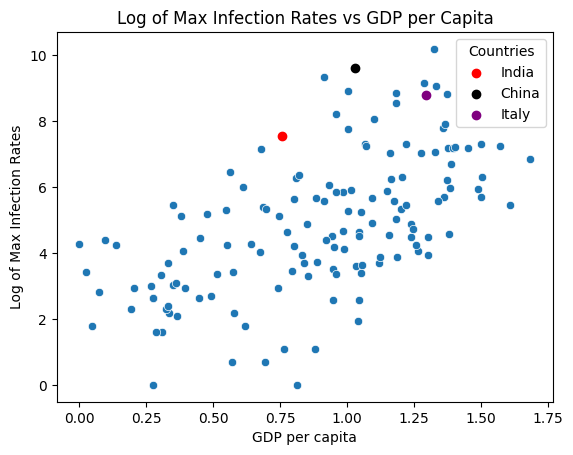

In [43]:
x = data["GDP per capita"]
y = data["max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "GDP per capita"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)


plt.xlabel("GDP per capita")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs GDP per Capita")

plt.legend(title='Countries')

plt.show()

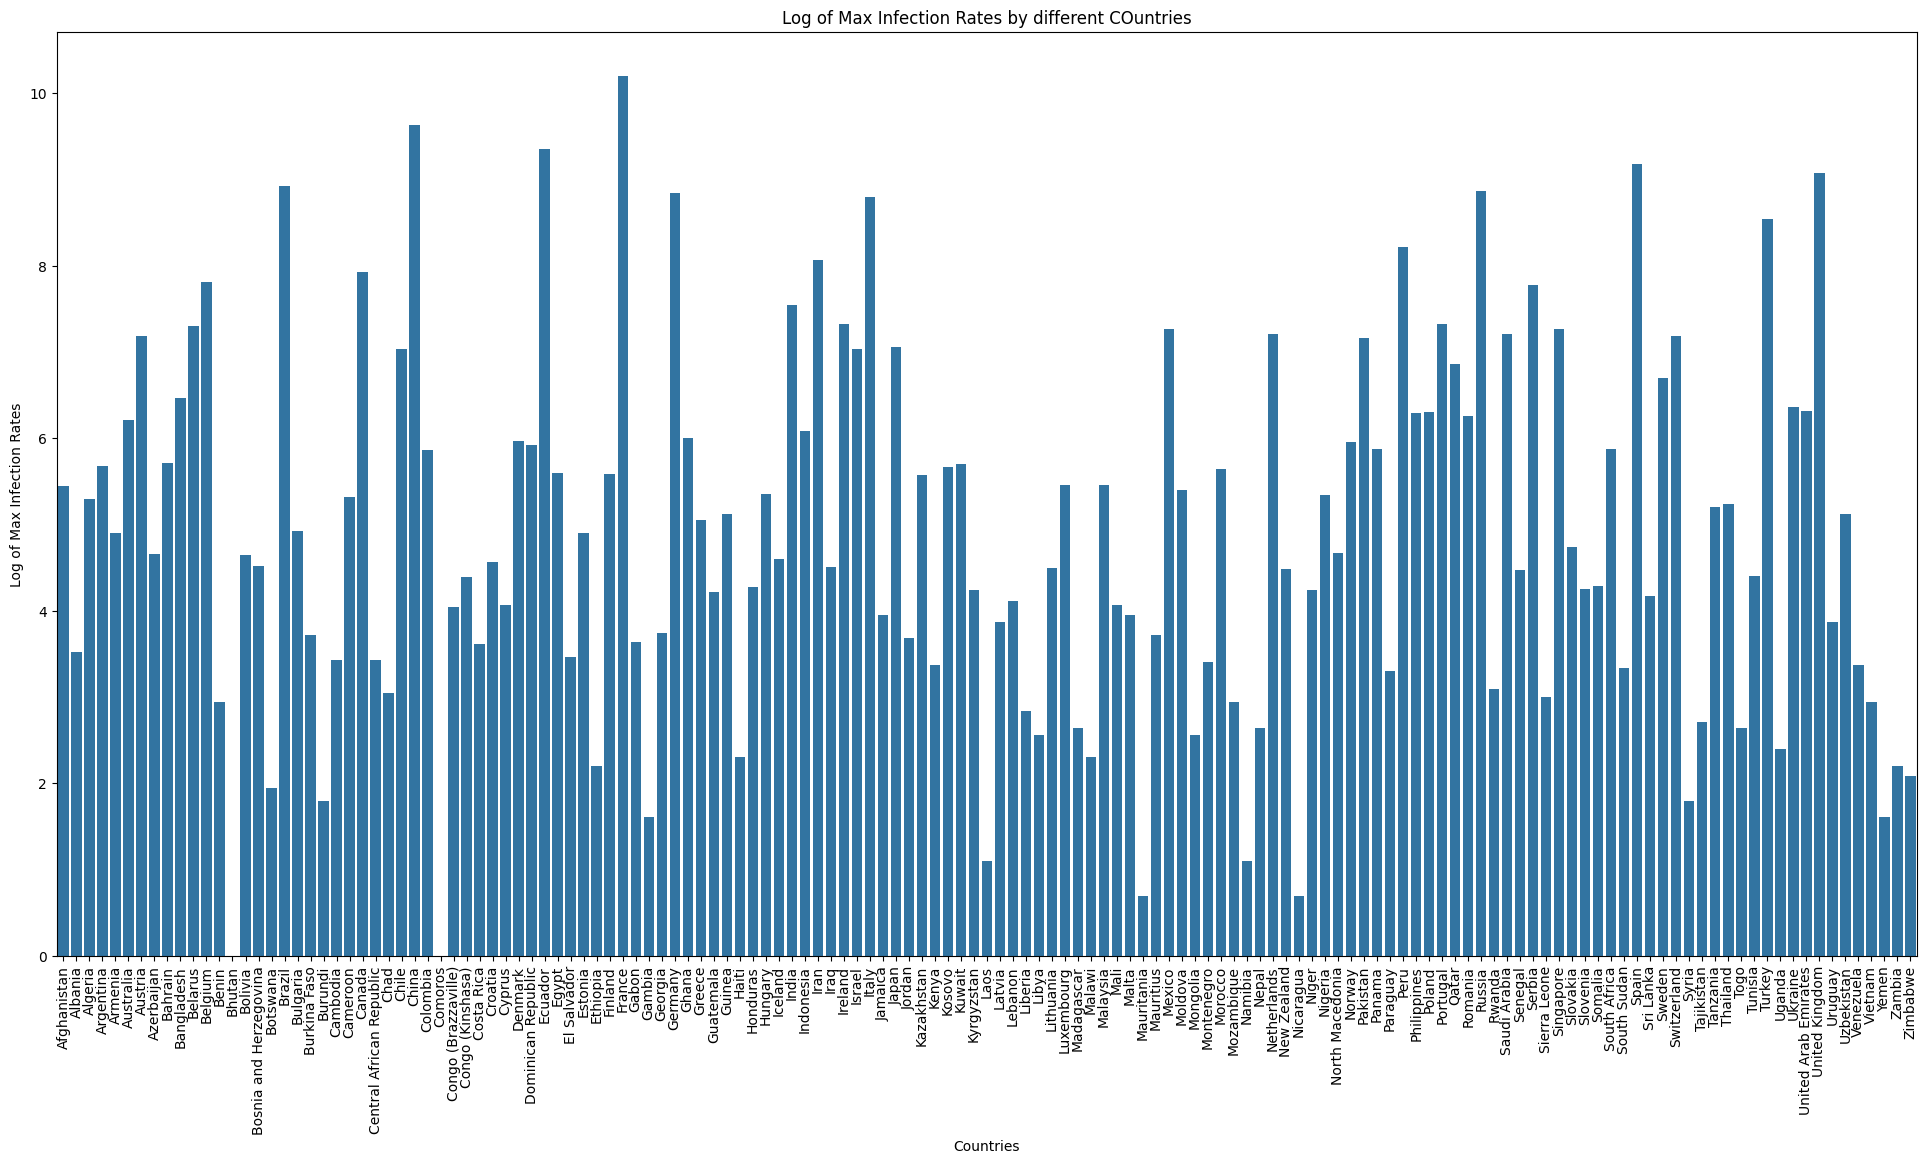

In [44]:
plt.figure(figsize=(24, 12))
sns.barplot(x=data.index, y=np.log(data["max_infection_rates"]), data=data)

plt.xlabel("Countries")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates by different COuntries")
plt.xticks(rotation=90)
plt.show()

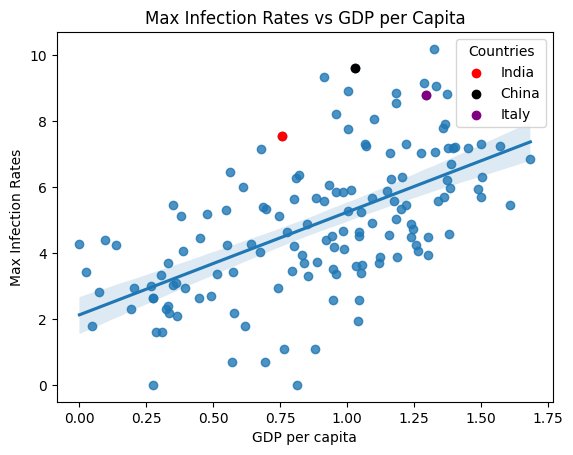

In [45]:
x = data["GDP per capita"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "GDP per capita"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("GDP per capita")
plt.ylabel("Max Infection Rates")
plt.title("Max Infection Rates vs GDP per Capita")

plt.legend(title='Countries')

plt.show()

### Plotting Social support vs Maximum Infection Rate

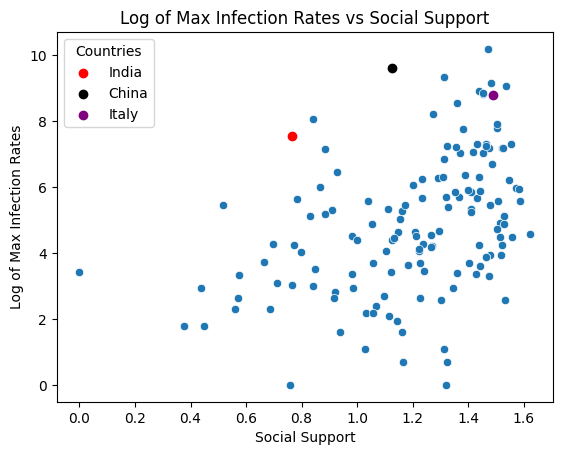

In [46]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "Social support"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("Social Support")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs Social Support")

plt.legend(title='Countries')

plt.show()

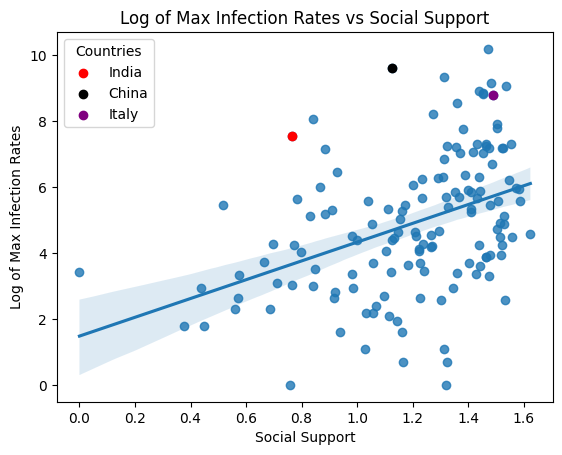

In [47]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "Social support"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("Social Support")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs Social Support")

plt.legend(title='Countries')

plt.show()

### Plotting Healthy Life Expectancy vs Maximum Infection rate

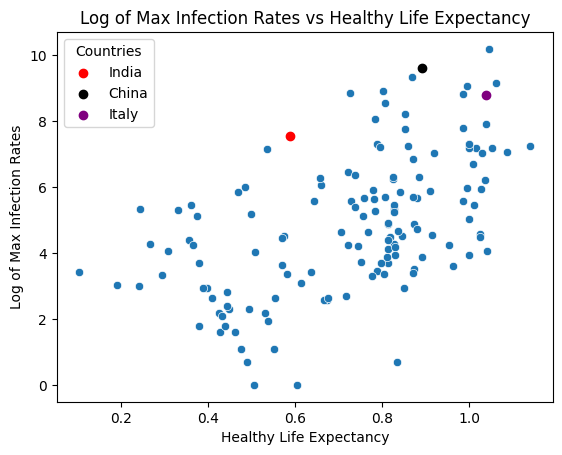

In [48]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "Healthy life expectancy"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs Healthy Life Expectancy")

plt.legend(title='Countries')

plt.show()

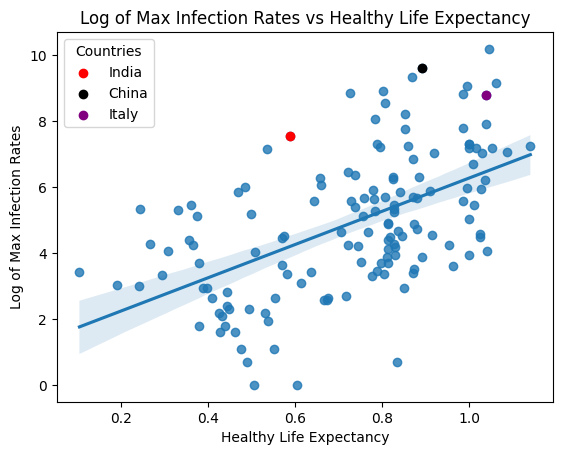

In [49]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "Healthy life expectancy"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs Healthy Life Expectancy")

plt.legend(title='Countries')

plt.show()

### Plotting Freedom to make Life Choices vs Maximum Infection Rate

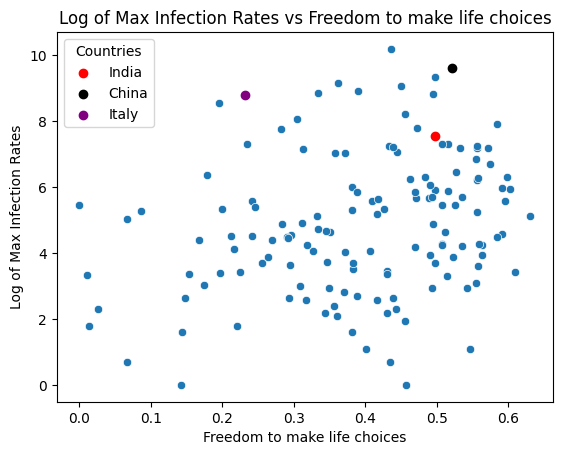

In [50]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "Freedom to make life choices"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("Freedom to make life choices")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs Freedom to make life choices")

plt.legend(title='Countries')

plt.show()

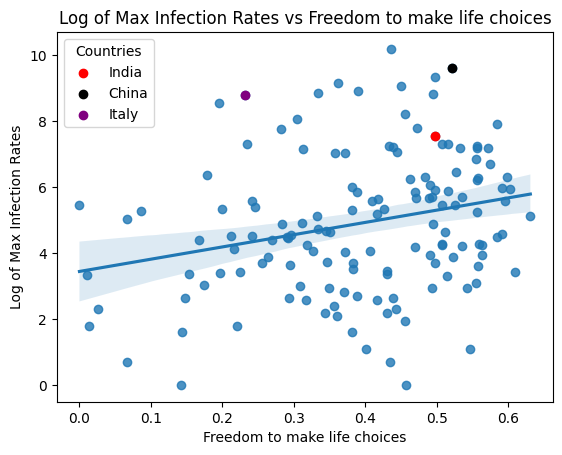

In [51]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "Freedom to make life choices"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("Freedom to make life choices")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs Freedom to make life choices")

plt.legend(title='Countries')

plt.show()

### Plotting Freedom to make Life Choices vs Corruption

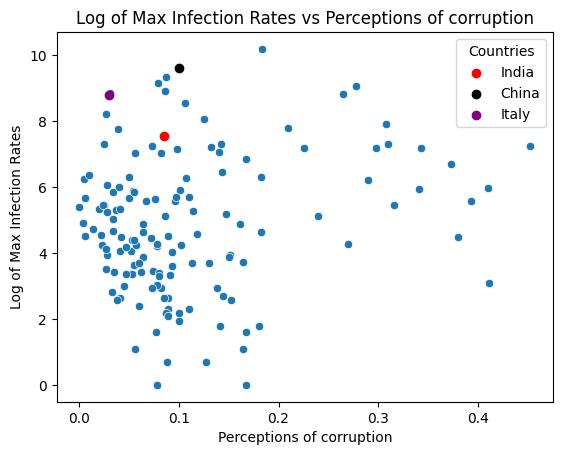

In [52]:
x = data["Perceptions of corruption"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "Perceptions of corruption"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("Perceptions of corruption")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs Perceptions of corruption")

plt.legend(title='Countries')

plt.show()

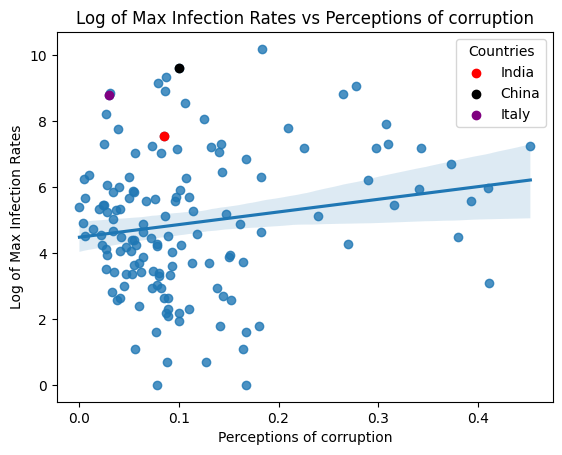

In [54]:
x = data["Perceptions of corruption"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

highlighted_countries = {
    "India": 'red',
    "China": 'black',
    "Italy": 'purple'
}

for country, color in highlighted_countries.items():
    if country in data.index:
        plt.scatter(data.loc[country, "Perceptions of corruption"],
                    np.log(data.loc[country, "max_infection_rates"]),
                    color=color, label=country)

plt.xlabel("Perceptions of corruption")
plt.ylabel("Log of Max Infection Rates")
plt.title("Log of Max Infection Rates vs Perceptions of corruption")

plt.legend(title='Countries')

plt.show()